# Гипотезы для увеличения выручки интернет-магазина

В нашем распоряжении данные крупного интернет-магазина.

Цель проекта — проверить гипотезы, которые могут помочь увеличить выручку.

Для достижения цели необходимо выполнить следующие задачи:
- загрузить и предобработать данные;
- приотезировать гипотезы;
- проанализировать A/B-тест и принять решение по результатам.

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd # импортируем библиотеку pandas
import datetime as dt # импортируем библиотеку datetime
import numpy as np # импортируем библиотеку numpy
import matplotlib.pyplot as plt # импортируем библиотеку matplotlib
import scipy.stats as stats # импортируем библиотеку scipy

## Загрузка и предобработка данных

### Загрузка данных

Загрузим данные.

In [2]:
hpts = pd.read_csv('/datasets/hypothesis.csv') # импортируем данные о гипотезах
orders = pd.read_csv('/datasets/orders.csv') # импортируем данные о заказах
visitors = pd.read_csv('/datasets/visitors.csv') # импортируем данные о пользователях

Выведем первые 5 строчек датафрейма с гипотезами.

In [3]:
hpts.head() # выведем первые 5 строчек таблицы с гипотезами

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


Посмотрим основную информацию о датафрейме с гипотезами.

In [4]:
hpts.info() # посмотрим основную информацию датафрейма с гипотезами

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Выведем первые 5 строчек датафрейма с заказами.

In [5]:
orders.head() # выведем первые 5 строчек таблицы с заказами

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Посмотрим основную информацию о датафрейме с заказами.

In [6]:
orders.info() # посмотрим основную информацию датафрейма с заказами

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
visitors.head() # выведем первые 5 строчек таблицы с посетителями

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
visitors.info() # посмотрим основную информацию датафрейма с посетителями

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Вывод**

В ходе данного шага было выполнено следующее:
- загрузили данные;
- изучили основную информацию.

Пропусков в данных не наблюдается. Необходимо привести к нужному типу данных столбец `date` в датафреймах `orders` и `visitors`. Названия столбцов в датафрейме `orders` лучше привести к змеиному регистру.

### Предобработка данных

Начнём предобработку с таблицы с данными о гипотезах.

Переименуем названия столбцов (приведём их к нижнему регистру).

In [9]:
hpts = hpts.rename(columns={'Hypothesis': 'hypothesis', 'Reach': 'reach', # приведём названия столбцов к нижнему регистру
                        'Impact': 'impact', 'Confidence': 'confidence', 'Efforts': 'efforts'})

В столбце `hypothesis` содержится текстовая информация. Теоретические там могут быть дубликаты. Изучим.

In [10]:
hpts['hypothesis'].duplicated().sum() # посмотрим на количество дубликатов в столбце hypothesis

0

Дубликаты отсутствуют. Остальные столбцы нет смысла проверять, так как там содержится числовая информация, которая может повторяться.

Изучим описание гипотез.

In [11]:
hpts['hypothesis'].unique() # выведем описание гипотез

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

Имеется опечатка в гипотизе `Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар` (должно быть `Изменить структурУ..`). Исправим это.

In [12]:
hpts['hypothesis'] = hpts['hypothesis'].replace('Изменить структура категорий, что увеличит '
                                            'конверсию, т.к. пользователи быстрее найдут нужный товар',
                         'Изменить структуру категорий, что увеличит '
                                            'конверсию, т.к. пользователи быстрее найдут нужный товар')

Теперь перейдём к таблице с заказами.

Приведём данные столбца `date` к нужному типу.

In [13]:
orders['date'] = pd.to_datetime(orders['date']) # приведём столбец к формату даты

Теперь переименуем наименования столбцов (приведём к змеиному регистру).

In [14]:
orders = orders.rename(columns={'transactionId': 'transaction_id', # приведём названия столбцов к змеиному регистру
                                'visitorId': 'visitor_id'})

Посмотрим, есть ли дубликаты.

In [15]:
orders.duplicated().sum() # выведем количество дубликатов

0

Дубликаты отсутствуют.

Теперь перейдём к таблице с пользователями.

Приведём данные столбца `date` к нужному типу.

In [16]:
visitors['date'] = pd.to_datetime(visitors['date']) # приведём столбец к формату даты

Посмотрим, есть ли дубликаты.

In [17]:
visitors.duplicated().sum() # выведем количество дубликатов

0

Дубликаты отсутствуют.

Теперь посмотрим, есть ли пользователи, которые попали в обе группы.

In [18]:
# сгруппируем пользователей по группам
pivot = pd.pivot_table(orders, index = 'visitor_id', columns = 'group', values = 'date', aggfunc = 'count')

# удалим пользователей, которые попали только в одну из групп
pivot_wo_null = pivot.dropna()

# выведем долю пользователей, попавших в обе группы, от общего числа пользователей
print(f'Доля пользователей в обеих группах от общего числа пользователей составляет {len(pivot_wo_null) / len(pivot):.1%}')

Доля пользователей в обеих группах от общего числа пользователей составляет 5.6%


Процент небольшой, но при этом за каждым отдельным пользователем должна закрепляться одна группа для чистоты эксперимента, поэтому исключим данных юзеров.

In [19]:
pivot_wo_null = pivot_wo_null.reset_index()
double_group = pivot_wo_null['visitor_id'] # выделим id этих пользователей
orders = orders.loc[~orders['visitor_id'].isin(double_group)] # исключим их из основного датафрейма

**Вывод**

В ходе данного шага было выполнено следующее:
- изменён регистр названий столбцов;
- изменён тип данных столбцов;
- проведена проверка на дубликаты;
- исправлена опечатка;
- удалены данные о пользователях, встречающихся в обеих группах.

## Приоритизация гипотез.

Применим фреймворк ICE.

In [20]:
hpts['ice'] = round((hpts['impact'] * hpts['confidence']) / hpts['efforts'], 1) # добавим столбец ice
round(hpts[['hypothesis', 'ice']].sort_values(by='ice', ascending = False), 1) # выведем полученные данные

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.2
0,"Добавить два новых канала привлечения трафика,...",13.3
7,Добавить форму подписки на все основные страни...,11.2
6,Показать на главной странице баннеры с актуаль...,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0
1,"Запустить собственную службу доставки, что сок...",2.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.3
3,"Изменить структуру категорий, что увеличит кон...",1.1
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0


In [21]:
hpts['ice'] = round((hpts['impact'] * hpts['confidence']) / hpts['efforts'], 1) # добавим столбец ice
round(hpts[['hypothesis', 'ice']].sort_values(by='ice', ascending = False), 1) # выведем полученные данные

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.2
0,"Добавить два новых канала привлечения трафика,...",13.3
7,Добавить форму подписки на все основные страни...,11.2
6,Показать на главной странице баннеры с актуаль...,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0
1,"Запустить собственную службу доставки, что сок...",2.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.3
3,"Изменить структуру категорий, что увеличит кон...",1.1
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0


Наименование гипотезы отображается не полностью. Расширим количество показываемых символов.

In [22]:
pd.options.display.max_colwidth = 150

Применим фреймворк RICE.

In [23]:
hpts['rice'] = (hpts['reach'] * hpts['impact'] * hpts['confidence']) / hpts['efforts'] # добавим столбец rice
round(hpts[['hypothesis', 'rice']].sort_values(by='rice', ascending = False), 1) # выведем полученные данные

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Фреймворки отличаются лишь тем, что при расчёте RICE дополнительно учитывается показатель количества пользователей, которых затронет изменение (показатель `reach`), поэтому чем больше данный показатель, тем значительнее будет перевес.

В данном случае восьмая гипотеза далеко впереди относительно остальных гипотез, при этом при расчёте ICE она была в тройке лидеров. Вероятнее всего она имеет наибольший показатель `reach`. Проверим это, выведя датафрейм целиком.

In [24]:
hpts # выведем всю таблицу с гипотезами

,hypothesis,reach,impact,confidence,efforts,ice,rice
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
3,"Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2


Действительно, показатель `reach` у восьмой гипотезы имеет наибольшую отметку.

Также стоит отметить первую гипотезу с хорошими показателями в обоих случаях.

## Анализ A/B-теста

Первым делом построим график кумулятивной выручки по группам.

Для начала создадим массив уникальных пар значений дат и групп теста.

In [25]:
dates_groups = orders[['date','group']].drop_duplicates() # создаем массив уникальных пар значений дат и групп теста

Теперь займёмся агрегацией данных о покупках: максимальная дата, максимальная группа (чтобы столбец `group` не пропал из итогового вывода), уникальные id заказов и пользователей, сумма средних чеков.

In [26]:
ord_agg = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 
      'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 
      'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

По аналогии агрегируем данные посетителей.

In [27]:
vis_agg = dates_groups.apply(lambda x: 
                                  visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                          visitors['group'] == x['group'])]\
                                  .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), 
                                  axis=1).sort_values(by=['date','group'])

Теперь объединим полученные таблицы.

In [28]:
# объединяем данные в одну таблицу
cummul_data = ord_agg.merge(vis_agg, left_on=['date', 'group'], right_on=['date', 'group'])

Присвоим нормальные названия столбцов.

In [29]:
# меняем названия столбцов
cummul_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Для каждой группы создадим отдельную таблицу.

In [30]:
# датафрейм с аггегированными данными в группе A
cummul_rer_a = cummul_data[cummul_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с аггегированными данными в группе B
cummul_rer_b = cummul_data[cummul_data['group']=='B'][['date','revenue', 'orders']]

### Кумулятивная выручка по группам

Подготовили необходимые данные, теперь займёмся построением графика кумулятивной выручки.

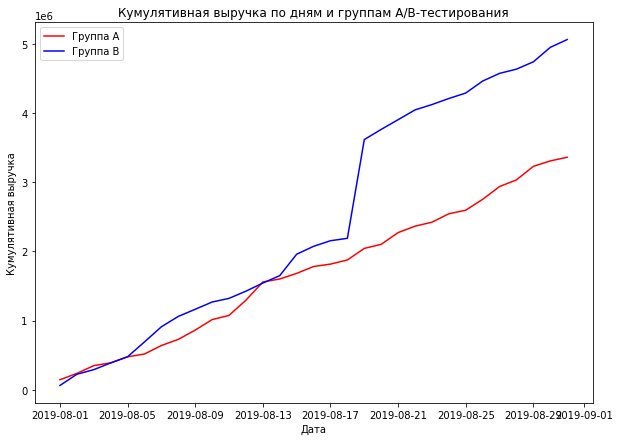

In [31]:
# зададим размер графика
plt.figure(figsize=(10, 7))
# график кумулятивной выручки группы A
plt.plot(cummul_rer_a['date'], cummul_rer_a['revenue'], color='red', label='Группа A')

# график кумулятивной выручки группы B
plt.plot(cummul_rer_b['date'], cummul_rer_b['revenue'], color='blue', label='Группа B')

plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.legend()
plt.show()

**Вывод**

Выручка от группы А растёт равномерно. В середине теста выручка от пользователей группы B резко увеличилась. Это может быть связано либо с появлением более дорогих заказов, либо о росте числа заказов.

### Кумулятивный средний чек по группам

Для построения графика кумулятивного среднего чека необходимо разделить кумулятивную выручку на кумулятивное количество заказов.

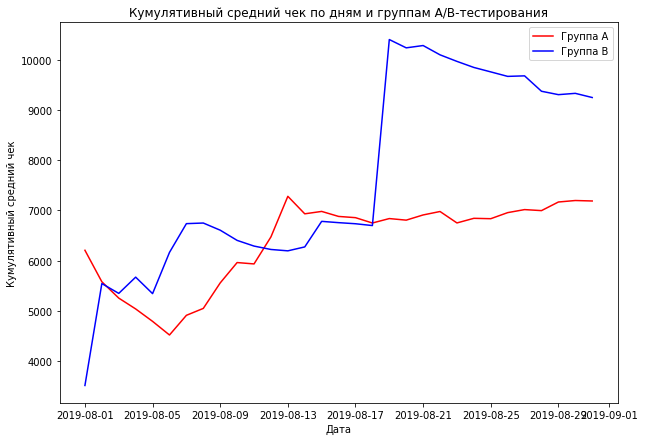

In [32]:
# зададим размер графика
plt.figure(figsize=(10, 7))

# построим график кумулятивного среднего чека группы А
plt.plot(cummul_rer_a['date'], cummul_rer_a['revenue'] / cummul_rer_a['orders'], color='red', label='Группа A')

# построим график кумулятивного среднего чека группы B
plt.plot(cummul_rer_b['date'], cummul_rer_b['revenue'] / cummul_rer_b['orders'], color='blue', label='Группа B')

# добавим подписи осей, название графика и легенду
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.title('Кумулятивный средний чек по дням и группам A/B-тестирования')
plt.legend()
plt.show()

**Вывод**

Средний чек группы A поначалу падал, упал меньше до менее чем 5000, затем резко вырос и более половины теста был стабилен на уровне 7000.

В группе B картина следующая: в первый день теста средний чек был меньше 5000, затем вырос до 7000, и в начале второй половины теста взлетел до более чем 10000, после чего до окончания теста равномерно снижался. Всплеск, вероятнее всего, был связан с аномально крупным заказом.

### Относительное изменение кумулятивного среднего чека группы B к группе A

Для начала объединим данные обеих групп в одну таблицу.

In [33]:
merged_cummul_rev = cummul_rer_a.merge(cummul_rer_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Добавим горизонтальную ось, проходящую через начало координат.

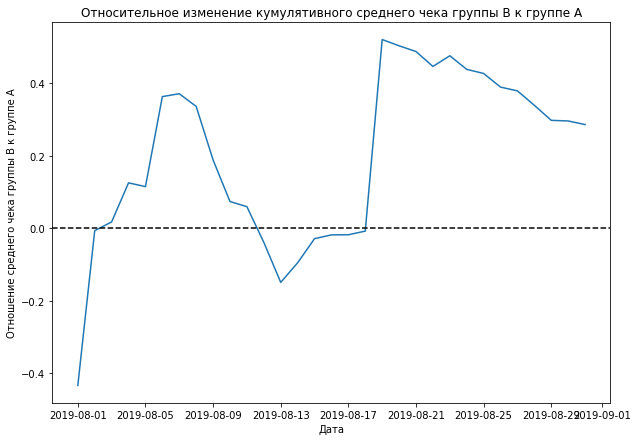

In [34]:
# зададим размер графика
plt.figure(figsize=(10, 7))

# поcтроим отношение средних чеков
plt.plot(merged_cummul_rev['date'], (merged_cummul_rev['revenueB']\
                                    /merged_cummul_rev['ordersB'])/(merged_cummul_rev['revenueA']\
                                                                   /merged_cummul_rev['ordersA'])-1)

# добавим горизонтальную ось
plt.axhline(y=0, color='black', linestyle='--')

# добавим подписи осей и название графика
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека группы B к группе A')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.show()

**Вывод**

График нестабилен, на всех участках скачет. Это может быть связано с выбросами (заказами с высокими чеками).

### Кумулятивное среднее количество заказов на посетителя по группам

Сперва посчитаем среднее число заказов на одного посетителя, затем разделим данные по группам.

In [35]:
# посчитаем среднее число заказов на одного посетителя
cummul_data['conversion'] = cummul_data['orders'] / cummul_data['visitors']

# разделяем данные по группе A
cummul_data_a = cummul_data[cummul_data['group']=='A']

# разделяем данные по группе B
cummul_data_b = cummul_data[cummul_data['group']=='B']

Теперь построим график.

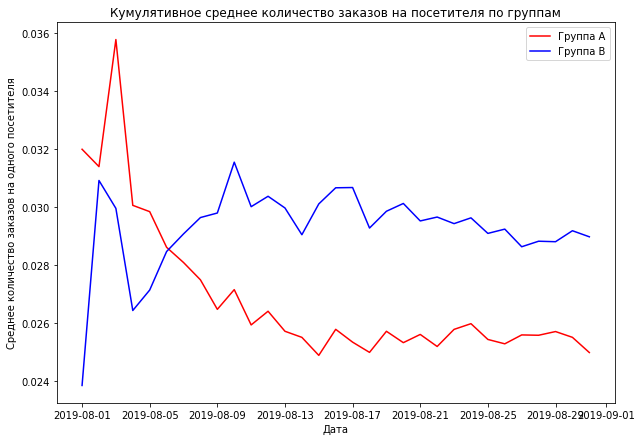

In [36]:
# зададим размер графика
plt.figure(figsize=(10, 7))

# построим графики
plt.plot(cummul_data_a['date'], cummul_data_a['conversion'], color = 'red', label='Группа A')
plt.plot(cummul_data_b['date'], cummul_data_b['conversion'], color = 'blue', label='Группа B')

# добавим подписи осей, название графика и легенду
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на одного посетителя')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.legend()
plt.show()

**Вывод**

Кривые практически зеркальные. По ним можно сделать вывод, что изменения благоприятно повлияли на среднее количество заказов на одного посетителя группы B.

### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A

Для начала создадим датафрейм, в котором будут объединены таблицы со средним количеством заказом пользователей обеих групп.

In [37]:
# объединяем таблицы со средним количеством заказов пользователей обеих групп
merged_cummul_conv = cummul_data_a[['date','conversion']]\
.merge(cummul_data_b[['date','conversion']], left_on='date', \
       right_on='date', how='left', suffixes=['A', 'B'])

Теперь построим соответствующий график.

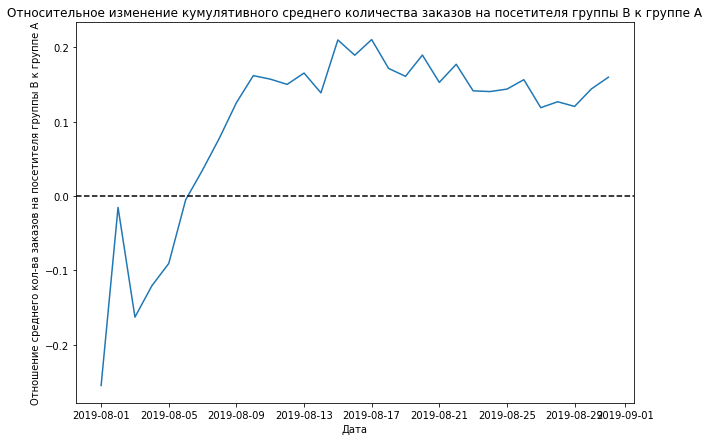

In [38]:
# зададим размер графика
plt.figure(figsize=(10, 7))

plt.plot(merged_cummul_conv['date'], 
         merged_cummul_conv['conversionB'] / merged_cummul_conv['conversionA']-1, 
         label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")

# добавим горизонтальную ось
plt.axhline(y=0, color='black', linestyle='--')

# добавим подписи осей и название графика
plt.xlabel('Дата')
plt.ylabel('Отношение среднего кол-ва заказов на посетителя группы B к группе A')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.show()

**Вывод**

Большую часть теста среднее количество заказов на посетителя наблюдается значительная разница в большую сторону у группы B. Интересно будет посмотреть на то, что будет после очищения данных от выбросов. 

### Количество заказов по пользователям

В рамках данного шага необходимо понять, сколько приходится заказов на уникального пользователя.

Для оценки данного параметра нам поможет точечный график. Построим его.

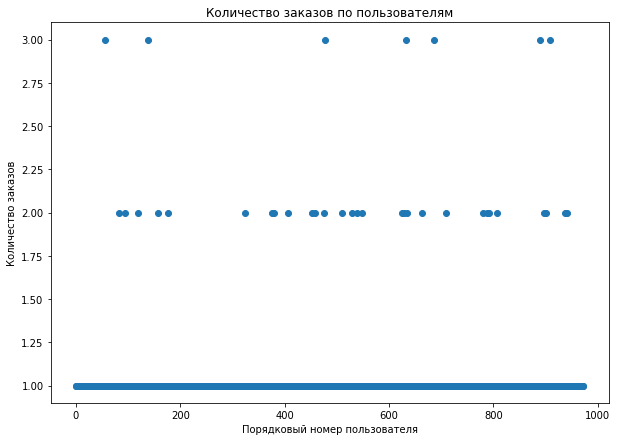

In [39]:
# зададим значение для оси x
x_val = pd.Series(range(0,len(orders.groupby(['visitor_id']).size())))

# зададим размер графика
plt.figure(figsize=(10, 7))
plt.scatter(x_val, orders.groupby(['visitor_id']).size())

# добавим подписи осей и название графика
plt.xlabel('Порядковый номер пользователя')
plt.ylabel('Количество заказов')
plt.title('Количество заказов по пользователям')
plt.show()

**Вывод**

Пользователи в основном совершают по одному заказу, что видно по непрерывной линии в нижней части графика. Реже встречаются юзеры с 2 заказами, с 3 крайне редко. Судя по графику, аномальное количество заказов начинается от 2, но для чистоты выводов необходимо посчитать 95-й и 99-й перцинтили.

### 95-й и 99-й перцентили количества заказов на пользователя

По точечному графику можно определить, где проходит граница аномального количества заказов, но лучше это сделать расчётным путём. Посчитаем 95-й и 99-й перцентили.

In [40]:
print(np.percentile(orders.groupby(['visitor_id']).size(), [95, 99])) 

[1. 2.]


**Вывод**

Не более 5% пользователей делают больше 1 заказf и не больше 1% — более 2.

В данном случае наиболее логичным вариантом верхней границей количества заказов будет 1 заказ.

### Стоимость заказов

Посмотрим точечный график распределения стоимостей заказов.

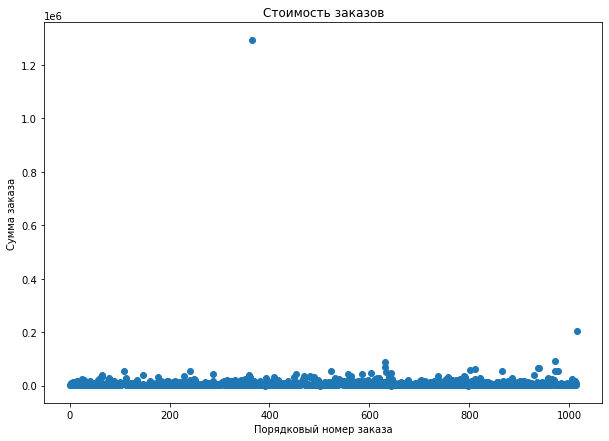

In [41]:
# зададим значение для оси x
x_val = pd.Series(range(0,len(orders['revenue'])))

# зададим размер графика
plt.figure(figsize=(10, 7))
plt.scatter(x_val, orders['revenue'])

# добавим подписи осей и название графика
plt.xlabel('Порядковый номер заказа')
plt.ylabel('Сумма заказа')
plt.title('Стоимость заказов')
plt.show()

**Вывод**

Почти все заказы сосредоточены в нижней части графика, до 100 тысяч. Одно значение выбивается из остальных — заказ более чем на 1,2 миллиона, из-за чего почти все значения превратились в линию. Этот заказ и объясняет такие резкие колебания в графиках, построенных ранее. Скорее всего, это заказ пользователя из группы B.

По данному графику сложно определить верхнюю границу стоимости, с которой начинаются аномальные значения. Для её определения посчитаем 95 и 99 перцентили.

### 95-й и 99-й перцентили стоимости заказов

Определим границу, с которой начинаются выбросы, с помощью расчёта 95 и 99 перцентилей.

In [42]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


**Вывод**

Не более 5% заказов имеют стоимость чуть меньше 27 тысяч. Примем это значение за верхнюю границу значений, которыми будем пользоваться для анализа.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформируем гипотезы.

**Нулевая**. Различия в среднем количестве заказов между группами отсутствует.

**Альтернативная**. Различия в среднем количестве заказов между группами имеются.

Теперь подготовим данные.

Создадим таблицы, в которых будет содержаться информация по заказам/посетителям в разбивке по дням и по группам.

In [43]:
# создадим таблицу с количеством заказов и суммой заказов в день от пользователей группы A
ord_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ord_a_daily.columns = ['date', 'ord_per_date_a', 'rev_per_date_a']


ord_a_cummul = ord_a_daily.apply(
    lambda x: ord_a_daily[ord_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'ord_per_date_a': 'sum', 'rev_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ord_a_cummul.columns = [
    'date',
    'ord_cummul_a',
    'rev_cummul_a',
]

# создадим таблицу с количеством заказов и суммой заказов в день от пользователей группы B
ord_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ord_b_daily.columns = ['date', 'ord_per_date_b', 'rev_per_date_b']

ord_b_cummul = ord_b_daily.apply(
    lambda x: ord_b_daily[ord_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'ord_per_date_b': 'sum', 'rev_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ord_b_cummul.columns = [
    'date',
    'ord_cummul_b',
    'rev_cummul_b',
]

# создадим таблицу с количеством посетителей группы A в день
vis_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
vis_a_daily.columns = ['date', 'vis_per_date_a']

vis_a_cummul = vis_a_daily.apply(
    lambda x: vis_a_daily[vis_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'vis_per_date_a': 'sum'}
    ),
    axis=1,
)
vis_a_cummul.columns = ['date', 'vis_cummul_a']

# создадим таблицу с количеством посетителей группы B в день
vis_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
vis_b_daily.columns = ['date', 'vis_per_date_b']

vis_b_cummul = vis_b_daily.apply(
    lambda x: vis_b_daily[vis_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'vis_per_date_b': 'sum'}
    ),
    axis=1,
)
vis_b_cummul.columns = ['date', 'vis_cummul_b']

Теперь создадим переменные, в которых будет указано количество заказов для всех пользователей, заказывавших что-то хотя бы 1 раз. Для каждой группы будет своя переменная.

In [44]:
# создадим переменную с количеством заказов для каждого пользователя группы A
ord_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ord_by_users_a.columns = ['visitor_id', 'orders']

# создадим переменную с количеством заказов для каждого пользователя группы B
ord_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ord_by_users_b.columns = ['visitor_id', 'orders']

Для проверки критерием Манна-Уитни создадим переменные, в которых юзерам каждой из групп будет соответствовать число совершённых заказов.

In [45]:
# создадим переменую для группы A
sample_a = pd.concat([ord_by_users_a['orders'], 
                      pd.Series(0, index=np.arange(vis_a_daily['vis_per_date_a'].sum() - 
                                                   len(ord_by_users_a['orders'])), name='orders')], axis=0)
# создадим переменую для группы B
sample_b = pd.concat([ord_by_users_b['orders'], 
                      pd.Series(0, index=np.arange(vis_b_daily['vis_per_date_b'].sum() - 
                                                   len(ord_by_users_b['orders'])), name='orders')], axis=0)

Теперь выведем p-value и разницу среднего количества заказов пользователей группы B относительно среднего количества заказов группы A (сырые данные).

In [46]:
print('p-value равен', "{0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print('Относительные различия в количестве заказов между группами', 
      "{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

p-value равен 0.011
Относительные различия в количестве заказов между группами 0.160


**Вывод**

Необработанные данные показывают, что разница между средним количеством заказов групп A и B есть.

p-value меньше 5%, из чего следует, что нулевая гипотеза отвергается.

Среднее количество заказов пользователей группы B на 16% больше среднего количества заказов пользователей группы A.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформируем гипотезы.

**Нулевая**. Различия в среднем чеке заказа между группами отсутствует.

**Альтернативная**. Различия в среднем чеке заказа между группами имеются.

Данные подготовили в прошлом шаге.

Выведем p-value и относительные различия в среднем чеке между группами.

Нулевая гипотеза — статистически значимых различий в среднем числе чеке между группами нет.

In [47]:
print('p-value равен', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))

print('Относительные различия в среднем чеке между группами (сырые данные)', 
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()-1))

p-value равен 0.829
Относительные различия в среднем чеке между группами (сырые данные) 0.287


**Вывод**

p-value равен почти 83%, что говорит о том, что нулевая гипотеза не отвергается. Средний чек между группами различается почти на 29%. Нет статистически значимого различия по среднему количеству заказов между группами.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Ранее мы выяснили, что 95-й и 99-й перцентили среднего количества заказов на одного посетителя равны 1 и 2 соответственно.

Посчитаем за аномальных пользователей, совершивших более 1 заказа.

In [48]:
# отдельно выведем пользователей, совершивших более 1 заказа
many_orders = pd.concat(
    [
        ord_by_users_a[ord_by_users_a['orders'] > 1]['visitor_id'],
        ord_by_users_b[ord_by_users_b['orders'] > 1]['visitor_id'],
    ],
    axis=0,
)

# отдельно выведем пользователей группы A без пользователей с аномальным количеством заказов
many_order_a = pd.concat(
    [
        ord_by_users_a[
            np.logical_not(ord_by_users_a['visitor_id'].isin(many_orders))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                vis_a_daily['vis_per_date_a'].sum() - len(ord_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# отдельно выведем пользователей группы B без пользователей с аномальным количеством заказов
many_order_b = pd.concat(
    [
        ord_by_users_b[
            np.logical_not(ord_by_users_b['visitor_id'].isin(many_orders))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                vis_b_daily['vis_per_date_b'].sum() - len(ord_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Теперь выведем p-value и разницу среднего количества заказов пользователей группы B относительно среднего количества заказов пользователей группы A (чистые данные).

In [49]:
print('p-value равен', '{0:.3f}'.format(stats.mannwhitneyu(many_order_a, many_order_b)[1]))
print('Относительные различия в среднем количестве заказов между группами (чистые данные)', 
      '{0:.3f}'.format(many_order_b.mean() / many_order_a.mean() - 1))

p-value равен 0.009
Относительные различия в среднем количестве заказов между группами (чистые данные) 0.183


**Вывод**

Данные не сильно поменялись — p-value меньше 1%, разница увеличилась чуть больше чем на 2%. Нулевая гипотеза отвергается в пользу альтернативной.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Ранее мы выяснили, что 95-й и 99-й перцентили среднего чека заказа равны 26785 и 53904 соответственно.

Посчитаем за аномальных пользователей, которые совершили заказы дороже 27000.

In [50]:
# отдельно выведем пользователей, которые совершили заказы дороже 27000
exp_orders = orders[orders['revenue'] > 27000]['visitor_id']

Теперь выведем p-value и разницу среднего чека заказов пользователей группы B относительно ссреднего чека заказов пользователей группы A (чистые данные).

In [51]:
print('p-value равен', 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(exp_orders)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(exp_orders)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия в среднем чеке между группами (чистые данные)', 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(exp_orders)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(exp_orders)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value равен 0.741
Относительные различия в среднем чеке между группами (чистые данные) -0.053


**Вывод**

После очистки данных p-value стал равен чуть больше 74% — нулевая гипотеза не отвергается.

Также после чистки разница между сегментами уменьшилась на более чем 30%. Нет статистически значимого различия по среднему чеку заказа между группами.

### Решение по результатам теста

**Вывод**

По результатам A/B теста было выявлено, что статичтическа значимая разница есть по количеству заказов (разница более чем на 18%), но нет по среднему чеку (разница чуть больше 5%). Тест оказался успешным, его можно завершать.

График кумулятивного среднего количества заказов показывает, что большую часть теста пользователи группы B совершали больше заказов, соответственно эта группа является победившей, так как выручка от них больше.